# Treadmill Buyer Profile Analysis

## Assignment

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

Product Portfolio:

- The KP281 is an entry-level treadmill that sells for $1,500;
- The KP481 is for mid-level runners and sells for $1,750;
- The KP781 treadmill is having advanced features and it sells for $2,500.

## Data Description

The company collected data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset in aerofit_treadmill_data.csv has the following features:

- Product - product purchased: KP281, KP481, or KP781
- Age - in years
- Gender - male/female
- Education - in years
- MaritalStatus - single or partnered
- Usage - the average number of times the customer plans to use the treadmill each week
- Fitness - self-rated fitness on a 1-5 scale, where 1 is the poor shape and 5 is the excellent shape
- Income - annual income in US dollars
- Miles - the average number of miles the customer expects to walk/run each week

## Practicalities

Analyze the provided data and provide insights to the best of your abilities. Include the relevant tables/graphs/visualization to explain what you have learned about the market.

In [71]:
import pandas as pd
import numpy as np

In [72]:
data = pd.read_csv('/Users/rosiebai/Downloads/datasets-12/aerofit_treadmill_data.csv')

In [73]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [74]:
data.shape

(180, 9)

## Age

In [75]:
data.groupby('Product')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
KP281,80.0,28.55,7.221452,18.0,23.00,26.0,33.00,50.0
KP481,60.0,28.90,6.645248,19.0,24.00,26.0,33.25,48.0
KP781,40.0,29.10,6.971738,22.0,24.75,27.0,30.25,48.0


<AxesSubplot:xlabel='Product', ylabel='Age'>

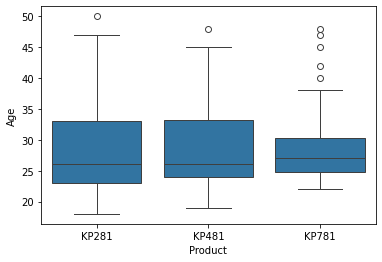

In [76]:
import seaborn as sns
sns.boxplot(x="Product", y="Age", data=data)


In [77]:
# statistical test - ANOVA (test if there is any statistical difference among three product groups)
from scipy.stats import f_oneway 
groups = [data.loc[data.Product == p, "Age"] for p in data["Product"]. unique()]
f_oneway(*groups)
# since the p-value is 0.91 > 0.05, there is no evidence suggesting that there is a difference. 

F_onewayResult(statistic=0.09421786067805005, pvalue=0.9101300808730235)

In [78]:
# chi-square test 
contingency_table = pd.crosstab(data['Product'], pd.cut(data['Age'], bins = [0, 20, 30, 40, 50, 100]))
contingency_table

Age,"(0, 20]","(20, 30]","(30, 40]","(40, 50]"
Product,,,,
KP281,6,49,19,6
KP481,4,31,23,2
KP781,0,30,6,4


In [79]:
# Run chi-square test of independence
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p:.4f}")
# Since the p-value is 0.0587 > 0.05, we don't have sufficient evidence to reject the null -->
# there is an association between age groups and product groups.

In [81]:
# Compute probabilities 
joint_prob = contingency_table/contingency_table.values.sum()
joint_prob

Age,"(0, 20]","(20, 30]","(30, 40]","(40, 50]"
Product,,,,
KP281,0.033333,0.272222,0.105556,0.033333
KP481,0.022222,0.172222,0.127778,0.011111
KP781,0.000000,0.166667,0.033333,0.022222


In [82]:
row_marginals = contingency_table.sum(axis = 1) / contingency_table.values.sum()
row_marginals

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
dtype: float64

In [83]:
col_marginals = contingency_table.sum(axis = 0) / contingency_table.values.sum()
col_marginals

Age
(0, 20]     0.055556
(20, 30]    0.611111
(30, 40]    0.266667
(40, 50]    0.066667
dtype: float64

In [84]:
# conditional probabilities
# p(product|agegroup): likelihood of buying each product given age group, this probability tells you what product different age group prefer.
cond_prob_age = contingency_table.div(contingency_table.sum(axis = 1), axis = 0)
cond_prob_age

Age,"(0, 20]","(20, 30]","(30, 40]","(40, 50]"
Product,,,,
KP281,0.075000,0.612500,0.237500,0.075000
KP481,0.066667,0.516667,0.383333,0.033333
KP781,0.000000,0.750000,0.150000,0.100000


### Insights:

It looks like that 
- age group below 20, which are young and budget-conscious consumers, prefer to buy the cheapest product, KP281 (0.08)
- age group 20~30, which are the young professionals at the gym, prefer to buy the most expensive product, KP781 (0.75)
- age group 30~40 prefers to buy KP481 (0.38)
- for people who are 40 and above, they prefer to buy the most expensive product as well, KP781 ( 0.1).

## Gender

In [86]:
contingency_table = pd.crosstab(data['Product'], data['Gender'])
contingency_table

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


In [87]:
# Run chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p:.4f}")
# Since the p-value is 0.0016 < 0.05, we can reject the null and conclude that
# there is an association between gender and products

Chi-square statistic: 12.924
Degrees of freedom: 2
P-value: 0.0016


In [88]:
# Compute probabilities 
joint_prob = contingency_table/contingency_table.values.sum()
joint_prob

Gender,Female,Male
Product,,
KP281,0.222222,0.222222
KP481,0.161111,0.172222
KP781,0.038889,0.183333


In [89]:
row_marginals = contingency_table.sum(axis = 1) / contingency_table.values.sum()
row_marginals

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
dtype: float64

In [90]:
col_marginals = contingency_table.sum(axis = 0) / contingency_table.values.sum()
col_marginals

Gender
Female    0.422222
Male      0.577778
dtype: float64

In [91]:
# conditional probabilities
# p(product|gender): likelihood of buying each product given gender
cond_prob_gender = contingency_table.div(contingency_table.sum(axis = 1), axis = 0)
cond_prob_gender

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000


### Insights:

It looks like that female customers prefer cheaper product, and the male customers prefer more expensive product. 

## Education

In [93]:
data.groupby('Product')['Education'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
KP281,80.0,15.037500,1.216383,12.0,14.0,16.0,16.0,18.0
KP481,60.0,15.116667,1.222552,12.0,14.0,16.0,16.0,18.0
KP781,40.0,17.325000,1.639066,14.0,16.0,18.0,18.0,21.0


<AxesSubplot:xlabel='Product', ylabel='Education'>

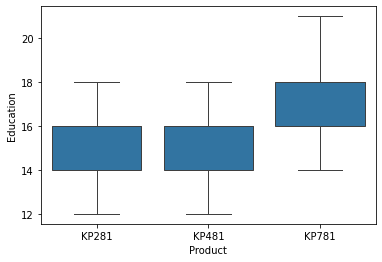

In [94]:
sns.boxplot(x="Product", y="Education", data=data)

In [95]:
# statistical test - ANOVA 
groups = [data.loc[data.Product == p, "Education"] for p in data["Product"]. unique()]
f_oneway(*groups)
# since the p-value is less than 0.05, suggesting that the mean education level differs among three groups.
# Based on the visualization, we can tell that people with higher educational level prefer to buy KP781. 

F_onewayResult(statistic=45.19038365853986, pvalue=1.3951292571863714e-16)

In [96]:
# chi-square test 
contingency_table = pd.crosstab(data['Product'], pd.cut(data['Education'], bins = [0, 12, 16, 18, 22]))
contingency_table

Education,"(0, 12]","(12, 16]","(16, 18]","(18, 22]"
Product,,,,
KP281,2,76,2,0
KP481,1,57,2,0
KP781,0,17,19,4


In [97]:
# Run chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p:.4f}")
# Since the p-value is less than 0.05, suggesting that there is an association between educational level and product groups.

Chi-square statistic: 73.833
Degrees of freedom: 6
P-value: 0.0000


In [98]:
# Compute probabilities 
joint_prob = contingency_table/contingency_table.values.sum()
joint_prob

Education,"(0, 12]","(12, 16]","(16, 18]","(18, 22]"
Product,,,,
KP281,0.011111,0.422222,0.011111,0.000000
KP481,0.005556,0.316667,0.011111,0.000000
KP781,0.000000,0.094444,0.105556,0.022222


In [101]:
row_marginals = contingency_table.sum(axis = 1) / contingency_table.values.sum()
row_marginals

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
dtype: float64

In [102]:
col_marginals = contingency_table.sum(axis = 0) / contingency_table.values.sum()
col_marginals

Education
(0, 12]     0.016667
(12, 16]    0.833333
(16, 18]    0.127778
(18, 22]    0.022222
dtype: float64

In [103]:
# conditional probabilities
# p(product|education_group): likelihood of buying each product given age group, this probability tells you what product different age group prefer.
cond_prob_edu = contingency_table.div(contingency_table.sum(axis = 1), axis = 0)
cond_prob_edu

Education,"(0, 12]","(12, 16]","(16, 18]","(18, 22]"
Product,,,,
KP281,0.025000,0.950,0.025000,0.0
KP481,0.016667,0.950,0.033333,0.0
KP781,0.000000,0.425,0.475000,0.1


### Insights:

It looks like that if your educational level is in 12 years and below, you are more likely to buy KP281.
if it's between 12 ~ 16, you are more likely to buy KP281 OR KP481.
if it's above 16 years, you are more likely to buy KP781.

## MaritalStatus

In [104]:
contingency_table = pd.crosstab(data['Product'], data['MaritalStatus'])
contingency_table

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


In [105]:
# Run chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p:.4f}")
# Since the p-value is 0.9605 > 0.05, we can't reject the null and conclude that
# there isn't a strong association between marital status and product groups

Chi-square statistic: 0.081
Degrees of freedom: 2
P-value: 0.9605


In [106]:
# Compute the probabilities
joint_prob = contingency_table/contingency_table.values.sum()
joint_prob

MaritalStatus,Partnered,Single
Product,,
KP281,0.266667,0.177778
KP481,0.200000,0.133333
KP781,0.127778,0.094444


In [108]:
row_marginals = contingency_table.sum(axis = 1)/contingency_table.values.sum()
row_marginals

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
dtype: float64

In [109]:
col_marginals = contingency_table.sum(axis = 0)/contingency_table.values.sum()
col_marginals
# 59% of the customers who bought the treadmill are partnered, 41% are singles. 

MaritalStatus
Partnered    0.594444
Single       0.405556
dtype: float64

In [110]:
# conditional probabilities
# p(product|gender): likelihood of buying each product given martial status 
cond_prob_marital = contingency_table.div(contingency_table.sum(axis = 1), axis = 0)
cond_prob_marital

MaritalStatus,Partnered,Single
Product,,
KP281,0.600,0.400
KP481,0.600,0.400
KP781,0.575,0.425


### Insights:

It looks like that if you are single, then the probability of getting the most expensive product is 2.5% higher than if you have a partner. If you are partnered, the probability of getting KP281 and KP481 are about the same, 60%; the probability of getting KP781 will decrease by 2.5%.  

In [111]:
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

## Usage

In [112]:
data.groupby('Product')['Usage'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
KP281,80.0,3.087500,0.782624,2.0,3.0,3.0,4.00,5.0
KP481,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
KP781,40.0,4.775000,0.946993,3.0,4.0,5.0,5.00,7.0


<AxesSubplot:xlabel='Product', ylabel='Usage'>

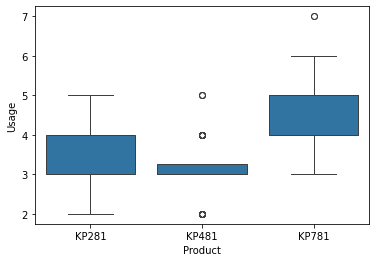

In [113]:
sns.boxplot(x = 'Product', y = 'Usage', data = data)

In [114]:
# statistical test - ANOVA
# test if there is any statistical difference among the avearge amount of times customers plan to use the treadmill of three product groups)
from scipy.stats import f_oneway 
groups = [data.loc[data.Product == p, "Usage"] for p in data["Product"]. unique()]
f_oneway(*groups)
# since the p-value is < 0.05, there is strong evidence suggesting that there is a difference. 

F_onewayResult(statistic=65.44446547156178, pvalue=5.281513288947641e-22)

In [115]:
contingency_table = pd.crosstab(data['Product'], data['Usage'])
contingency_table

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,19,37,22,2,0,0
KP481,14,31,12,3,0,0
KP781,0,1,18,12,7,2


In [116]:
# Compute the probabilities 
joint_prob = contingency_table/contingency_table.values.sum()
joint_prob

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,0.105556,0.205556,0.122222,0.011111,0.000000,0.000000
KP481,0.077778,0.172222,0.066667,0.016667,0.000000,0.000000
KP781,0.000000,0.005556,0.100000,0.066667,0.038889,0.011111


In [117]:
row_marginals = contingency_table.sum(axis = 1)/contingency_table.values.sum()
row_marginals

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
dtype: float64

In [118]:
col_marginals = contingency_table.sum(axis = 0)/contingency_table.values.sum()
col_marginals
# most (38%) people use any treadmill, no matter which product, 3 times per week. 

Usage
2    0.183333
3    0.383333
4    0.288889
5    0.094444
6    0.038889
7    0.011111
dtype: float64

In [119]:
# conditional probabilities 
# p(product|usage): likelihood of buying each product given usage
cond_prob_usage = contingency_table.div(contingency_table.sum(axis = 1), axis = 0)
cond_prob_usage

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,0.237500,0.462500,0.275,0.025,0.000,0.00
KP481,0.233333,0.516667,0.200,0.050,0.000,0.00
KP781,0.000000,0.025000,0.450,0.300,0.175,0.05


### Insights:

If a customer's weekly workout frequency is 3 times and below, they are more likely to buy KP281 & KP418. Once the usage passes 3 this threshold, they are more likely to buy KP781. We can definitely recommend the more expensive product to the customers who use treadmill more frequent each week. 

## Fitness

In [120]:
data.groupby('Product')['Fitness'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
KP281,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
KP481,60.0,2.9000,0.629770,1.0,3.0,3.0,3.0,4.0
KP781,40.0,4.6250,0.667467,3.0,4.0,5.0,5.0,5.0


<AxesSubplot:xlabel='Product', ylabel='Fitness'>

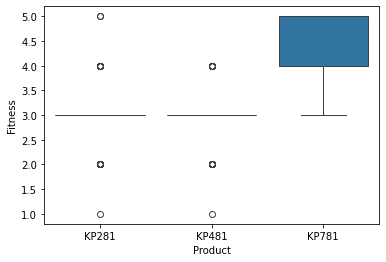

In [121]:
sns.boxplot(x = 'Product', y = 'Fitness', data = data)

In [122]:
# statistical test - ANOVA (test if there is any statistical difference among the mean fitness level for three product groups)
from scipy.stats import f_oneway 
groups = [data.loc[data.Product == p, "Fitness"] for p in data["Product"]. unique()]
f_oneway(*groups)
# since the p-value is < 0.05, there is a strong evidence suggesting that there is a difference. 

F_onewayResult(statistic=104.00134919323754, pvalue=1.3554706834328812e-30)

In [123]:
contingency_table = pd.crosstab(data['Product'], data['Fitness'])
contingency_table

Fitness,1,2,3,4,5
Product,,,,,
KP281,1,14,54,9,2
KP481,1,12,39,8,0
KP781,0,0,4,7,29


In [124]:
joint_prob = contingency_table/contingency_table.values.sum()
joint_prob

Fitness,1,2,3,4,5
Product,,,,,
KP281,0.005556,0.077778,0.300000,0.050000,0.011111
KP481,0.005556,0.066667,0.216667,0.044444,0.000000
KP781,0.000000,0.000000,0.022222,0.038889,0.161111


In [125]:
col_marginals = contingency_table.sum(axis = 0)/contingency_table.values.sum()
col_marginals
# if the customer's fitness level/body shape is good or on average, they tend to use the product more.

Fitness
1    0.011111
2    0.144444
3    0.538889
4    0.133333
5    0.172222
dtype: float64

In [126]:
# conditional probability
# p(product|fitness): likelihood of buying each product given the fitness level
cond_prob_fitness = contingency_table.div(contingency_table.sum(axis = 1), axis = 0)
cond_prob_fitness

Fitness,1,2,3,4,5
Product,,,,,
KP281,0.012500,0.175,0.675,0.112500,0.025
KP481,0.016667,0.200,0.650,0.133333,0.000
KP781,0.000000,0.000,0.100,0.175000,0.725


### Insights:

If a customer's body shape is average or below average, then they tend to buy KP281 & KP481. If a customer's body shape is very good, the likehoold of buying the most expensive product is very high, 73%.  

## Income

In [127]:
data.groupby('Product')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
KP281,80.0,46418.025,9075.783190,29562.0,38658.00,46617.0,53439.0,68220.0
KP481,60.0,48973.650,8653.989388,31836.0,44911.50,49459.5,53439.0,67083.0
KP781,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.0,104581.0


<AxesSubplot:xlabel='Product', ylabel='Income'>

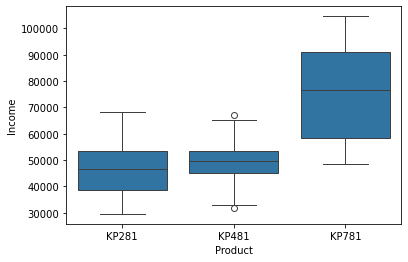

In [128]:
sns.boxplot(x = 'Product', y = 'Income', data = data )

In [129]:
# statistical test - ANOVA 
groups = [data.loc[data.Product == p, "Income"] for p in data["Product"]. unique()]
f_oneway(*groups)
# since the p-value is less than 0.05, there is a strong evidence suggesting that
# there is a difference between the avearge income among these three product groups. 

F_onewayResult(statistic=89.25903546601671, pvalue=1.5644991316342494e-27)

In [132]:
data['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [135]:
contingency_table = pd.crosstab(data['Product'], pd.cut(data['Income'], bins = [0, 30000, 40000, 50000, 60000, 100000, 120000]))
contingency_table

Income,"(0, 30000]","(30000, 40000]","(40000, 50000]","(50000, 60000]","(60000, 100000]","(100000, 120000]"
Product,,,,,,
KP281,1,22,25,26,6,0
KP481,0,9,21,23,7,0
KP781,0,0,5,6,26,3


In [136]:
joint_prob = contingency_table/contingency_table.values.sum()
joint_prob

Income,"(0, 30000]","(30000, 40000]","(40000, 50000]","(50000, 60000]","(60000, 100000]","(100000, 120000]"
Product,,,,,,
KP281,0.005556,0.122222,0.138889,0.144444,0.033333,0.000000
KP481,0.000000,0.050000,0.116667,0.127778,0.038889,0.000000
KP781,0.000000,0.000000,0.027778,0.033333,0.144444,0.016667


In [139]:
col_marginals = contingency_table.sum(axis = 0)/contingency_table.values.sum()
col_marginals
# if your income falls between 50,000 ~ 60,000, you are most likely (31%) to buy a treadmill. 

Income
(0, 30000]          0.005556
(30000, 40000]      0.172222
(40000, 50000]      0.283333
(50000, 60000]      0.305556
(60000, 100000]     0.216667
(100000, 120000]    0.016667
dtype: float64

In [140]:
# conditional probability
# p(product|income): likelihood of buying each product given income
cond_prob_income = contingency_table.div(contingency_table.sum(axis = 1), axis = 0)
cond_prob_income

Income,"(0, 30000]","(30000, 40000]","(40000, 50000]","(50000, 60000]","(60000, 100000]","(100000, 120000]"
Product,,,,,,
KP281,0.0125,0.275,0.3125,0.325000,0.075000,0.000
KP481,0.0000,0.150,0.3500,0.383333,0.116667,0.000
KP781,0.0000,0.000,0.1250,0.150000,0.650000,0.075


### Insights:

If your income is 60,000 or below, you are more likely to buy KP281 & KP481. If your income is above 60,000, then you are most likely to buy KP781.

## Miles

In [141]:
data.groupby('Product')['Miles'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
KP281,80.0,82.787500,28.874102,38.0,66.0,85.0,94.0,188.0
KP481,60.0,87.933333,33.263135,21.0,64.0,85.0,106.0,212.0
KP781,40.0,166.900000,60.066544,80.0,120.0,160.0,200.0,360.0


<AxesSubplot:xlabel='Product', ylabel='Miles'>

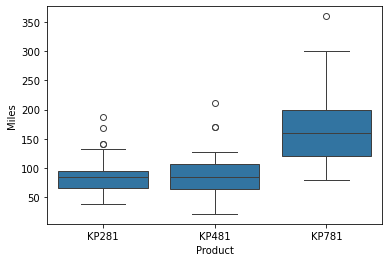

In [143]:
sns.boxplot(x = 'Product', y = 'Miles', data = data)

In [144]:
# statistical test - ANOVA 
groups = [data.loc[data.Product == p, "Miles"] for p in data["Product"]. unique()]
f_oneway(*groups)
# since the p-value is less than 0.05, there is a strong evidence suggesting that
# there is a difference between the avearge miles among these three product groups. 

F_onewayResult(statistic=68.24179605090241, pvalue=1.0730574762130848e-22)

In [145]:
data['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

In [146]:
contingency_table = pd.crosstab(data['Product'], pd.cut(data['Miles'], bins = [0,20,70,100,150,200,300,400]))
contingency_table

Miles,"(20, 70]","(70, 100]","(100, 150]","(150, 200]","(200, 300]","(300, 400]"
Product,,,,,,
KP281,28,34,16,2,0,0
KP481,18,26,13,2,1,0
KP781,0,8,9,18,4,1


In [147]:
joint_prob = contingency_table/contingency_table.values.sum()
joint_prob

Miles,"(20, 70]","(70, 100]","(100, 150]","(150, 200]","(200, 300]","(300, 400]"
Product,,,,,,
KP281,0.155556,0.188889,0.088889,0.011111,0.000000,0.000000
KP481,0.100000,0.144444,0.072222,0.011111,0.005556,0.000000
KP781,0.000000,0.044444,0.050000,0.100000,0.022222,0.005556


In [150]:
col_marginals = contingency_table.sum(axis = 0)/contingency_table.values.sum()
col_marginals

Miles
(20, 70]      0.255556
(70, 100]     0.377778
(100, 150]    0.211111
(150, 200]    0.122222
(200, 300]    0.027778
(300, 400]    0.005556
dtype: float64

In [151]:
# conditional probability
# p(product|miles): likelihood of buying each product given miles
cond_prob_miles = contingency_table.div(contingency_table.sum(axis = 1), axis = 0)
cond_prob_miles

Miles,"(20, 70]","(70, 100]","(100, 150]","(150, 200]","(200, 300]","(300, 400]"
Product,,,,,,
KP281,0.35,0.425000,0.200000,0.025000,0.000000,0.000
KP481,0.30,0.433333,0.216667,0.033333,0.016667,0.000
KP781,0.00,0.200000,0.225000,0.450000,0.100000,0.025


### Insights:

If your weekly miles is 150 and below, you are more likely to buy KP281 & KP481.
If your weekly miles is above 150, then you are more likely to buy KP781.

## Final Summary

In [153]:
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

Gender, education, usage, fitness, income and miles are strong predictors. If you are a male customer, you are more likely to buy the more expensive product. For the rest of the variables, the higher the level, the more likely to buy the more expensive product.